In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib inline

In [4]:
cols = ["distance", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
sharp_df = pd.read_csv("sharp_10-80_nocap.csv", header=None, names=cols)
sharp_df



,distance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,297,297,297,303,301,288,298,297,297,301,297,297,315,298,319
1,10,420,401,397,397,398,396,397,392,397,415,397,423,396,397,397
2,20,231,231,230,255,230,220,231,230,232,230,255,231,224,230,230
3,30,168,168,171,167,191,168,174,168,168,168,168,168,168,171,168
4,40,133,132,112,133,133,133,132,129,128,134,133,132,133,153,132
5,50,109,114,109,127,108,110,109,92,109,109,109,109,109,109,110
6,60,97,93,93,94,93,115,93,76,93,93,93,93,115,93,76
7,70,85,80,85,85,85,85,72,86,85,86,85,68,85,85,89
8,80,86,77,92,85,81,86,85,87,76,85,83,81,56,90,81
9,90,64,89,73,90,93,114,81,73,85,93,93,85,93,93,95


In [5]:
sharp_df["average_reading"] = sharp_df[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].mean(axis=1)
sharp_df

,distance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,average_reading
0,0,297,297,297,303,301,288,298,297,297,301,297,297,315,298,319,300.133333
1,10,420,401,397,397,398,396,397,392,397,415,397,423,396,397,397,401.333333
2,20,231,231,230,255,230,220,231,230,232,230,255,231,224,230,230,232.666667
3,30,168,168,171,167,191,168,174,168,168,168,168,168,168,171,168,170.266667
4,40,133,132,112,133,133,133,132,129,128,134,133,132,133,153,132,132.133333
5,50,109,114,109,127,108,110,109,92,109,109,109,109,109,109,110,109.466667
6,60,97,93,93,94,93,115,93,76,93,93,93,93,115,93,76,94.000000
7,70,85,80,85,85,85,85,72,86,85,86,85,68,85,85,89,83.066667
8,80,86,77,92,85,81,86,85,87,76,85,83,81,56,90,81,82.066667
9,90,64,89,73,90,93,114,81,73,85,93,93,85,93,93,95,87.600000


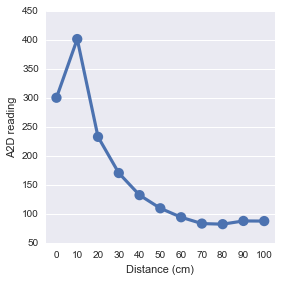

In [6]:
digital_output_graph = sns.factorplot(data=sharp_df, x="distance", y="average_reading")
digital_output_graph.set_axis_labels("Distance (cm)", "A2D reading")

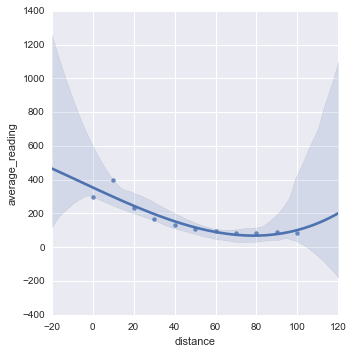

In [7]:
digital_output_graph = sns.lmplot(data=sharp_df, x="distance", y="average_reading",order=3)

In [8]:
def inverse(distance):
        if(distance != 0):
            return  1.0/distance
        else:
            return 0
        
    

inversed_distances = sharp_df["distance"]
inversed_distances = inversed_distances[1:11]
sharp_df["inversed_distance"] = inversed_distances.map(inverse)
sharp_df

,distance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,average_reading,inversed_distance
0,0,297,297,297,303,301,288,298,297,297,301,297,297,315,298,319,300.133333,NaN
1,10,420,401,397,397,398,396,397,392,397,415,397,423,396,397,397,401.333333,0.100000
2,20,231,231,230,255,230,220,231,230,232,230,255,231,224,230,230,232.666667,0.050000
3,30,168,168,171,167,191,168,174,168,168,168,168,168,168,171,168,170.266667,0.033333
4,40,133,132,112,133,133,133,132,129,128,134,133,132,133,153,132,132.133333,0.025000
5,50,109,114,109,127,108,110,109,92,109,109,109,109,109,109,110,109.466667,0.020000
6,60,97,93,93,94,93,115,93,76,93,93,93,93,115,93,76,94.000000,0.016667
7,70,85,80,85,85,85,85,72,86,85,86,85,68,85,85,89,83.066667,0.014286
8,80,86,77,92,85,81,86,85,87,76,85,83,81,56,90,81,82.066667,0.012500
9,90,64,89,73,90,93,114,81,73,85,93,93,85,93,93,95,87.600000,0.011111


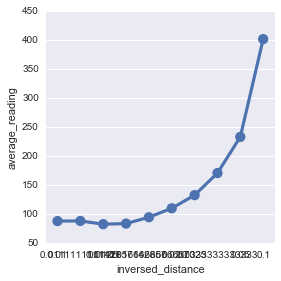

In [9]:
sns.factorplot(data=sharp_df,x="inversed_distance", y="average_reading")

In [10]:
voltage_step = 5.0/1024
voltage_step
sharp_df["average_voltage"] = sharp_df.average_reading * voltage_step
sharp_df

,distance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,average_reading,inversed_distance,average_voltage
0,0,297,297,297,303,301,288,298,297,297,301,297,297,315,298,319,300.133333,NaN,1.465495
1,10,420,401,397,397,398,396,397,392,397,415,397,423,396,397,397,401.333333,0.100000,1.959635
2,20,231,231,230,255,230,220,231,230,232,230,255,231,224,230,230,232.666667,0.050000,1.136068
3,30,168,168,171,167,191,168,174,168,168,168,168,168,168,171,168,170.266667,0.033333,0.831380
4,40,133,132,112,133,133,133,132,129,128,134,133,132,133,153,132,132.133333,0.025000,0.645182
5,50,109,114,109,127,108,110,109,92,109,109,109,109,109,109,110,109.466667,0.020000,0.534505
6,60,97,93,93,94,93,115,93,76,93,93,93,93,115,93,76,94.000000,0.016667,0.458984
7,70,85,80,85,85,85,85,72,86,85,86,85,68,85,85,89,83.066667,0.014286,0.405599
8,80,86,77,92,85,81,86,85,87,76,85,83,81,56,90,81,82.066667,0.012500,0.400716
9,90,64,89,73,90,93,114,81,73,85,93,93,85,93,93,95,87.600000,0.011111,0.427734


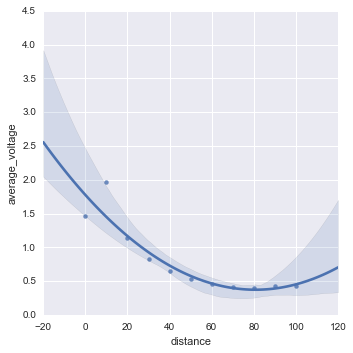

In [11]:
sns.lmplot(data=sharp_df,x="distance",y="average_voltage",order=2)

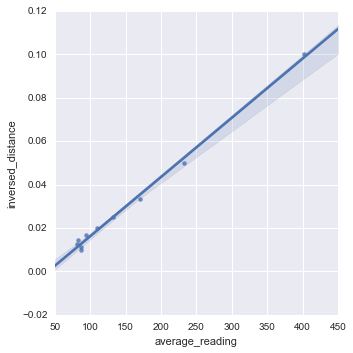

In [12]:
sns.lmplot(data=sharp_df,x="average_reading",y="inversed_distance")

In [15]:
x = sharp_df.average_reading[1:]
y = sharp_df.inversed_distance[1:]
p1 = np.polyfit(x, y,1)
p1



array([ 0.00027293, -0.01110356])

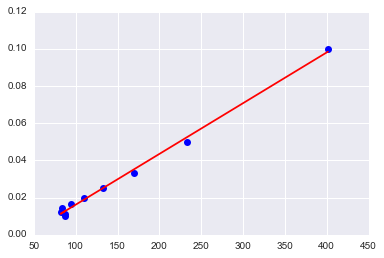

In [20]:
plt.plot(x,y,'bo')
plt.plot(x,np.polyval(p1,x),'r')

In [59]:
slope,intercept,r_value,p_value,std_err = stats.linregress(x,y)
r_value

0.99727913734116058

In [58]:
# coefficients for linear equation, 
# line equation:
# y = 0.00027293x - 0.01110356
# where y = 1/R and x = A2D reading
p1
print p_value

2.38993365235e-10


In [62]:
def conToDistance(reading):
    dist = 1/((0.00027293 * reading) - 0.01110356)
    return dist

predicted_distances = sharp_df["average_reading"]
predicted_distances = predicted_distances[1:11]
sharp_df["predicted_distance"] = predicted_distances.map(conToDistance)
sharp_df



    

,distance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,average_reading,inversed_distance,average_voltage,predicted_distance
0,0,297,297,297,303,301,288,298,297,297,301,297,297,315,298,319,300.133333,NaN,1.465495,NaN
1,10,420,401,397,397,398,396,397,392,397,415,397,423,396,397,397,401.333333,0.100000,1.959635,10.159262
2,20,231,231,230,255,230,220,231,230,232,230,255,231,224,230,230,232.666667,0.050000,1.136068,19.084642
3,30,168,168,171,167,191,168,174,168,168,168,168,168,168,171,168,170.266667,0.033333,0.831380,28.274689
4,40,133,132,112,133,133,133,132,129,128,134,133,132,133,153,132,132.133333,0.025000,0.645182,40.064760
5,50,109,114,109,127,108,110,109,92,109,109,109,109,109,109,110,109.466667,0.020000,0.534505,53.267488
6,60,97,93,93,94,93,115,93,76,93,93,93,93,115,93,76,94.000000,0.016667,0.458984,68.719738
7,70,85,80,85,85,85,85,72,86,85,86,85,68,85,85,89,83.066667,0.014286,0.405599,86.446672
8,80,86,77,92,85,81,86,85,87,76,85,83,81,56,90,81,82.066667,0.012500,0.400716,88.535570
9,90,64,89,73,90,93,114,81,73,85,93,93,85,93,93,95,87.600000,0.011111,0.427734,78.093836
